<a href="https://colab.research.google.com/github/EmilisGit/Deep_learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

## Var 1

Excluding iris flower: setosa


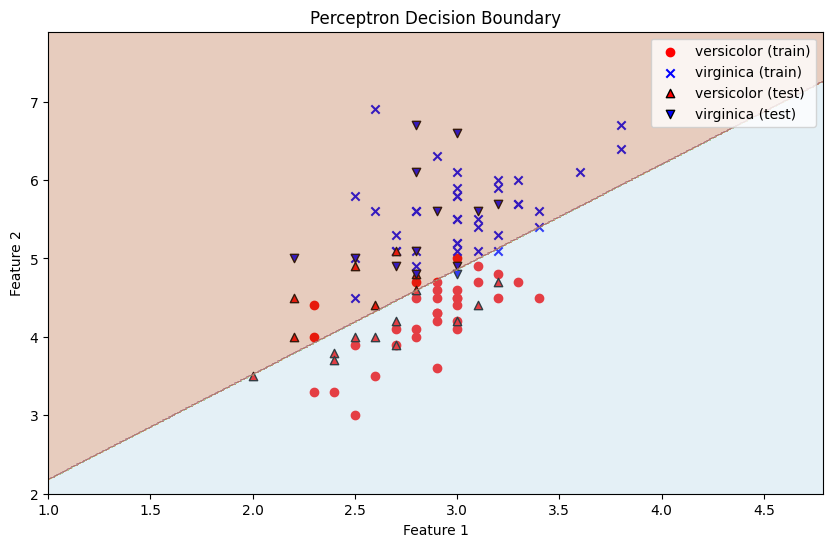

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data[:, 1:3]  # Use only the first two features
y = iris.target

exclude = 0;
flowers = iris.target_names;
print("Excluding iris flower: " + flowers[exclude])


X = X[y != exclude]  # Select only Setosa and Versicolor classes
y = y[y != exclude]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='o', label=f'{flowers[1]} (train)')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='blue', marker='x', label=f'{flowers[2]} (train)')

# Plot testing data
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', marker='^', edgecolor='k', label=f'{flowers[1]} (test)')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='blue', marker='v', edgecolor='k', label=f'{flowers[2]} (test)')

perceptron = Perceptron(max_iter=200, tol=1e-4, random_state=42)
perceptron.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
X_try_all = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(X_try_all)
ZZ = Z.reshape(xx.shape)
plt.contourf(xx, yy, ZZ, alpha=0.3, cmap=plt.cm.Paired)

plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
Z

array([1, 1, 1, ..., 0, 0, 0])

[('correct', 67), ('wrong', 3)]
[('correct', 29), ('wrong', 1)]
[ 1.75 -3.26]


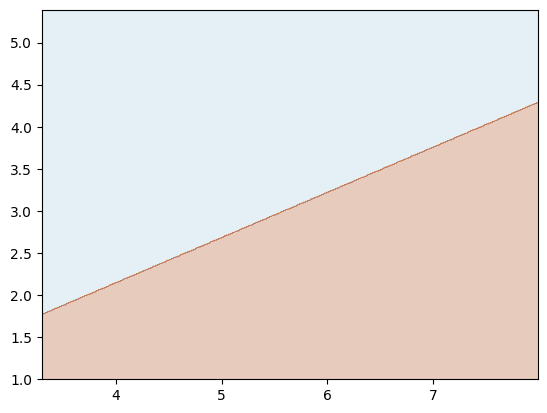

In [ ]:
import numpy as np
from collections import Counter

class Perceptron:

    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        return 0 if x < 0 else 1

    def __call__(self, in_data):
        weighted_sum = np.dot(self.weights, in_data)
        return Perceptron.unit_step_function(weighted_sum)

    def fit(self, target_result, calculated_result, in_data):
        in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


    def predict(self, data):
        predictions = []
        for index in range(len(data)):
            predictions.append(int(round(self(data[index]))))
        return predictions

p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(X_train[:,:])):
    p.fit(y_train[index],  p(X_train[index]),  X_train[index])

evaluation = p.evaluate(X_train, y_train)
print(evaluation.most_common())
evaluation = p.evaluate(X_test, y_test)
print(evaluation.most_common())
print(p.weights)



Zn = p.predict(X_try_all)
Zn = np.asarray(Zn)
ZZn = Zn.reshape(xx.shape)
plt.contourf(xx, yy, ZZn, alpha=0.3, cmap=plt.cm.Paired)



In [ ]:
Zn

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train[0:10,:]

array([[4.8, 3.4],
       [4.6, 3.2],
       [6. , 3.4],
       [5.2, 3.4],
       [5. , 2.3],
       [5.4, 3.9],
       [5.6, 3. ],
       [6.7, 3.1],
       [5. , 3.2],
       [5.4, 3.9]])